In [4]:
# Implementing UCB

import math
import numpy as np


In [18]:
#Demo Pre-conditions

rounds = 50000
#k = 3 # number of arms
true_prob = (0.2, 0.6, 0.4)
active_arms = [0, 1, 2]
k = len(true_prob)

#Number of times the slot machine is played
N = np.zeros(k)

# Sum of rewards of the slot machine up till now
R = np.zeros(k)

# Average rewards of each slot machine up till now
r = np.zeros(k)

# Action Probabilities
p = np.zeros(k)

# cumulative rewards
cumulative_rewards = np.zeros(rounds)

# played_arm
arm_played = np.empty(rounds)
# rewards per round
rewards = np.zeros(rounds)
rewards_per_round = np.zeros((k,rounds), dtype=float)


# best arm per round
#global best_arms
best_arms = np.zeros(rounds, dtype=int)

# Initiate regrets
regret_per_round = np.zeros(rounds) 
cumulated_regrets = np.zeros(rounds)



#This is for plotting purpose
line1 = list()
line2 = list()
line3 = list()


def apply_action(action):
    result = np.random.choice(np.arange(2), 1, p=[1-true_prob[action], true_prob[action] ])
    return result

# Get the expected reward of the chosen arm
def get_expected_reward(chosen, t): 
    # this obtains the empirical expected rewards
    # sum the rewards up to round t-1, including round 0. t represents the current round
    if t:
        return np.sum(rewards_per_round[chosen][:t])/t
    return 0

def record_rewards(t, chosen_arm, reward):
    # update rewards and rewards_per_round
    rewards[t] = reward
    N[chosen_arm] += 1
    R[chosen_arm] += reward
    #print(reward)
    rewards_per_round[chosen_arm, t] = reward
    
    # register average rewards
    r[chosen_arm] = R[chosen_arm] / N[chosen_arm]
    
    
    #update cumulative rewards
    if t > 0:
        cumulative_rewards[t] = reward + cumulative_rewards[t-1] 
    else:
        cumulative_rewards[t] = reward
        
        
# Register the regret
def register_regret(chosen,t):
    # Calculate regrets

    regret =  max(true_prob) - get_expected_reward(chosen,t)
        
    regret_per_round[t] = regret

    if t > 0:
        cumulated_regrets[t] = regret + cumulated_regrets[t-1] 
    else:
        cumulated_regrets[t] = regret

        
# # Play a couple times
# for i in range(10):
    
#     for j in range(k):
#         N[j] += 1
#         R[j] += apply_action(j)
#         r[j] = R[j] / N[j]
        
    
#print(R) 

# for round_index in range(rounds):
        
#     UCB_MAX = np.zeros(k)
#     for j in range(k):
#         r[j] = R[j] / N[j]
        
#         t = math.log(round_index+1) / N[j]
#         confidence = math.sqrt((3./2) *t)
#         UCB_MAX[j] = r[j] + confidence
        
#     # Selecting the best arm 
#     best_arm = np.argmax(UCB_MAX)
#     #print(best_arm)
#     reward = apply_action(best_arm)
#     #print(reward)
#     record_rewards(round_index, best_arm, reward)
        
#     best_arms[round_index] = best_arm
#     register_regret(best_arm, round_index)
confidence_interval = 1.0
time = 0
for round_index in range(int(math.log2(rounds/math.exp(1)) / 2.0)):
    
    n_m = 2 * math.log(rounds *confidence_interval**2) / (confidence_interval**2)
    print(n_m)
    if (len(active_arms) > 1):
        for arm in active_arms:
            while N[arm] < n_m:
                arm_played[time] = arm
                reward = apply_action(arm)
                record_rewards(time, arm, reward)
                register_regret(arm, time)
                time += 1
                
    else:
        arm = active_arms[0]
        while time < rounds:
            arm_played[time] = arm
            reward = apply_action(arm)
            record_rewards(time, arm, reward)
            register_regret(arm, time)
            time += 1
    # arm elimination
    active_arms_copy = active_arms.copy()

    max_confidence = max(r) - math.sqrt(math.log(rounds * confidence_interval ** 2 ) / (2.0* n_m))
    print("max confidence interval is %s " % (confidence_interval)) 
    for arm in active_arms_copy:
        print("arm %d average reward is %s" % (arm, r[arm]))
        if r[arm] + math.sqrt(math.log(rounds * confidence_interval ** 2) / (2.0 * n_m)) < max_confidence:
            print("true")
            active_arms.remove(arm)
    confidence_interval = confidence_interval / 2.0
    print("confidence interval is %s " %(confidence_interval))
    
        
            

            

    
    
#print(best_arms)      
#print(regret_per_round)
print(active_arms)

21.639556568820566
max confidence interval is 1.0 
arm 0 average reward is 0.0909090909091
arm 1 average reward is 0.5
arm 2 average reward is 0.318181818182
confidence interval is 0.5 
75.46787138632314
max confidence interval is 0.5 
arm 0 average reward is 0.118421052632
arm 1 average reward is 0.526315789474
arm 2 average reward is 0.302631578947
confidence interval is 0.25 
257.51006598945605
max confidence interval is 0.25 
arm 0 average reward is 0.151162790698
true
arm 1 average reward is 0.589147286822
arm 2 average reward is 0.383720930233
confidence interval is 0.125 
852.5945857344782
max confidence interval is 0.125 
arm 1 average reward is 0.618991793669
arm 2 average reward is 0.404454865182
true
confidence interval is 0.0625 
2700.595630044529
max confidence interval is 0.0625 
arm 1 average reward is 0.604103172493
confidence interval is 0.03125 
7963.25166860458
max confidence interval is 0.03125 
arm 1 average reward is 0.604103172493
confidence interval is 0.015625 

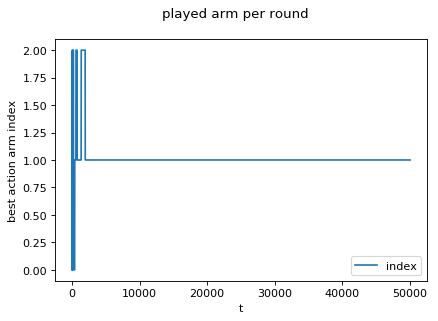

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['savefig.dpi'] = 80 # size parameter for inline
mpl.rcParams['figure.dpi'] = 100 # size parameter for notebook
x_axis = range(rounds)

def plot_arms(best_arms):
    fig = plt.figure()
    line_1, = plt.plot(x_axis, best_arms, label='index')
    plt.ylabel('best action arm index')
    plt.xlabel('t')
    plt.legend(loc="lower right",handles=[line_1])
    fig.suptitle("played arm per round")
    fig.savefig('test.jpg')
    plt.show()
    
#print(best_arms)
plot_arms(arm_played)

C:\Users\lucas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:532: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000002210EF5D048> has a label of '_line0' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


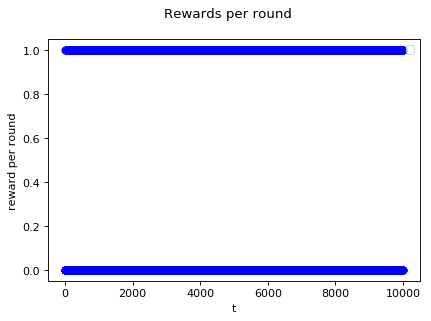

In [20]:
def plot_rewards(rewards):
    fig = plt.figure()
    line_1, = plt.plot(x_axis[:10000], rewards[:10000], 'bo')
    #print(rewards)
    plt.ylabel('reward per round')
    plt.xlabel('t')
    plt.legend(handles=[line_1])
    fig.suptitle("Rewards per round")
    fig.savefig('test.jpg')
    plt.show()
    
plot_rewards(rewards)


C:\Users\lucas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:532: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000002210DDCB630> has a label of '_line0' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


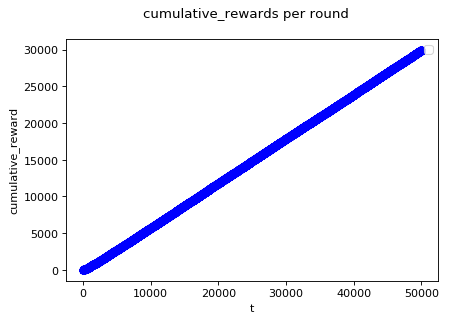

In [21]:
def plot_cumulative_rewards(cumulative_rewards):
    fig = plt.figure()
    line_1, = plt.plot(x_axis, cumulative_rewards, 'bo')

    plt.ylabel('cumulative_reward')
    plt.xlabel('t')
    plt.legend(handles=[line_1])
    fig.suptitle("cumulative_rewards per round")
    fig.savefig('test.jpg')
    plt.show()
    
plot_cumulative_rewards(cumulative_rewards)

C:\Users\lucas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:532: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000002210DD0C2E8> has a label of '_line0' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


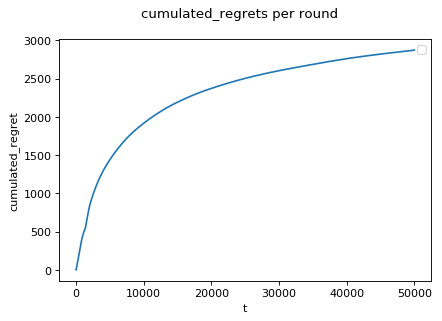

In [22]:
def plot_cumulated_regrets(cumulated_regrets):
    fig = plt.figure()
    line_1, = plt.plot(x_axis,cumulated_regrets)

    plt.ylabel('cumulated_regret')
    plt.xlabel('t')
    plt.legend(handles=[line_1])
    fig.suptitle("cumulated_regrets per round")
    fig.savefig('test.jpg')
    plt.show()
    
plot_cumulated_regrets(cumulated_regrets)

In [14]:
# Get variance

def record_rewards(t, chosen_arm, reward):
    # update rewards and rewards_per_round
    rewards[t] = reward
    N[chosen_arm] += 1
    R[chosen_arm] += reward
    #print(reward)
    rewards_per_round[chosen_arm, t] = reward
    
    # register average rewards
    r[chosen_arm] = R[chosen_arm] / N[chosen_arm]
    
    
    #update cumulative rewards
    if t > 0:
        cumulative_rewards[t] = reward + cumulative_rewards[t-1] 
    else:
        cumulative_rewards[t] = reward
        
trials = 10
trial_rounds = [1000 * 2 ** i for i in range(6)]
regret_variance = np.zeros(len(trial_rounds))
true_prob = (0.2, 0.6, 0.4)

for (index, rounds) in enumerate(trial_rounds):
    active_arms = [0, 1, 2]
    # cumulative rewards
    cumulative_rewards = np.zeros(rounds)
    k = len(active_arms)
    print(active_arms)
    # played_arm
    arm_played = np.empty(rounds)
    # rewards per round
    rewards = np.zeros(rounds)
    rewards_per_round = np.zeros((k,rounds), dtype=float)
    print(rewards_per_round.shape)
    # Initiate regrets
    regret_per_round = np.zeros(rounds) 
    cumulated_regrets = np.zeros(rounds)

    # Initialize record for best_arm
    best_arm = np.zeros(rounds,dtype = int)
      
    
    confidence_interval = 1.0
    time = 0
    for round_index in range(int(math.log2(rounds/math.exp(1)) / 2.0)):

        n_m = 2 * math.log(rounds *confidence_interval**2) / (confidence_interval**2)
        #print(n_m)
        if (len(active_arms) > 1):
            for arm in active_arms:
                while N[arm] < n_m:
                    arm_played[time] = arm
                    reward = apply_action(arm)
                    record_rewards(time, arm, reward)
                    register_regret(arm, time)
                    time += 1

        else:
            arm = active_arms[0]
            while time < rounds:
                arm_played[time] = arm
                reward = apply_action(arm)
                record_rewards(time, arm, reward)
                register_regret(arm, time)
                time += 1
        # arm elimination
        active_arms_copy = active_arms.copy()

        max_confidence = max(r) - math.sqrt(math.log(rounds * confidence_interval ** 2 ) / (2.0* n_m))
        #print("max confidence interval is %s " % (confidence_interval)) 
        for arm in active_arms_copy:
            #print("arm %d average reward is %s" % (arm, r[arm]))
            if r[arm] + math.sqrt(math.log(rounds * confidence_interval ** 2) / (2.0 * n_m)) < max_confidence:
                #print("true")
                active_arms.remove(arm)
        confidence_interval = confidence_interval / 2.0
        #print("confidence interval is %s " %(confidence_interval))
    regret_variance[index] = np.var(regret_per_round)

print(regret_variance)

[0, 1, 2]
(3, 1000)
[0, 1, 2]
(3, 2000)
[0, 1, 2]
(3, 4000)
[0, 1, 2]
(3, 8000)
[0, 1, 2]
(3, 16000)
[0, 1, 2]
(3, 32000)
[  0.00000000e+00   0.00000000e+00   4.75669054e-04   1.84819875e-04
   1.31376229e-04   6.22937574e-05]


C:\Users\lucas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:532: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000002210DCE8208> has a label of '_line0' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


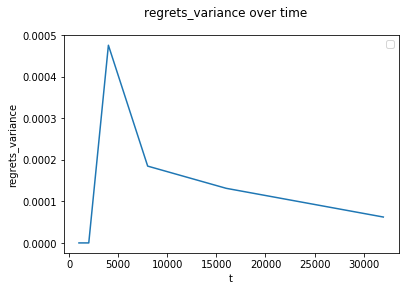

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
def plot_regrets_variance(regrets_variance):
    fig = plt.figure()
    x_axis = trial_rounds
    line_1, = plt.plot(x_axis,regrets_variance)

    plt.ylabel('regrets_variance')
    plt.xlabel('t')
    plt.legend(handles=[line_1])
    fig.suptitle("regrets_variance over time")
    fig.savefig('test.jpg')
    plt.show()
    
plot_regrets_variance(regret_variance)